In [74]:
# Initialize Sentiment Analyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
import time
import pandas 
import matplotlib.pyplot as plt
import requests as req
import json
import random 
import numpy
analyzer = SentimentIntensityAnalyzer()
consumer_key ="OXIssui06lxnfblyDvyggPZDf"
consumer_secret ="NrYzmgtyU9grTqJPXR1I9VRMJZ7ViIaYluLLSpqa0bQZ713Rli"
access_token ="326281341-haVlmBoQsZbodflSAbbunuRwnqvuOEynygFeu4XZ"
access_secret = "askACO40IXdUOqMvVcIEGW5lO1gW8zMwOUkGYeEa80XCK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [75]:
target_user = "BBCWorld"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


# BBC (@BBCWorld) 
# CBS (@CBSNews)
# CNN (@cnn)
# Fox (@foxnews)
# New York times (@nytimes)


In [76]:
len(tweet_text)

100

In [77]:
tweet_text[0]

'Venezuelan cash crisis: Where a coffee costs wads of banknotes https://t.co/1b1vvcEjBo'

In [78]:
compound_bbc=[]
for bbctweet in tweet_text:
    results = analyzer.polarity_scores(bbctweet)
    compound = results["compound"]
    compound_bbc.append(compound)

In [79]:
target_user = "CBSNews"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [80]:
compound_cbs=[]
for cbstweet in tweet_text:
    results = analyzer.polarity_scores(cbstweet)
    compound = results["compound"]
    compound_cbs.append(compound)

In [81]:
target_user = "cnn"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [82]:
compound_cnn=[]
for cnntweet in tweet_text:
    results = analyzer.polarity_scores(cnntweet)
    compound = results["compound"]
    compound_cnn.append(compound)

In [83]:
target_user = "foxnews"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [84]:
compound_fox=[]
for foxtweet in tweet_text:
    results = analyzer.polarity_scores(foxtweet)
    compound = results["compound"]
    compound_fox.append(compound)

In [85]:
target_user = "nytimes"
tweet_text=[]
for x in range(5):
    public_tweets = api.user_timeline(target_user, page=x)
   
    for tweet in public_tweets:
        text = tweet["text"]
        tweet_text.append(text)


In [86]:
compound_nytimes=[]
for nytimestweet in tweet_text:
    results = analyzer.polarity_scores(nytimestweet)
    compound = results["compound"]
    compound_nytimes.append(compound)

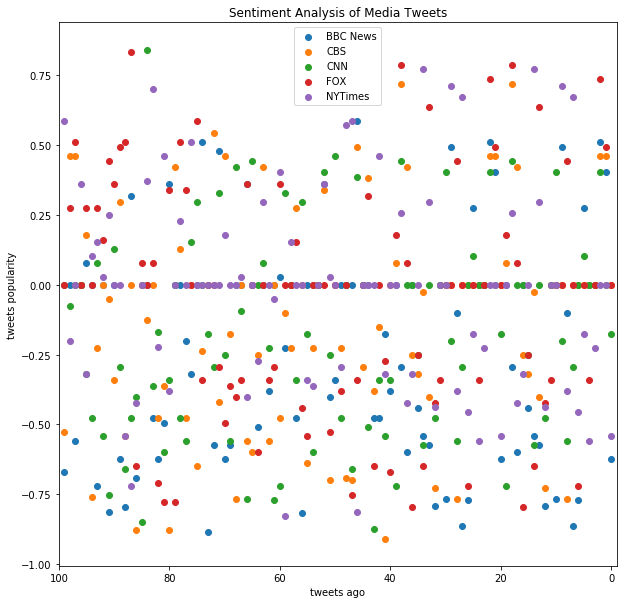

In [87]:
plt.figure(figsize=(10, 10))
plt.scatter(x = range(100), y =compound_bbc, label="BBC News")
plt.scatter(x = range(100), y =compound_cbs, label="CBS")
plt.scatter(x = range(100), y =compound_cnn, label="CNN")
plt.scatter(x = range(100), y =compound_fox, label="FOX")
plt.scatter(x = range(100), y =compound_nytimes, label="NYTimes")
plt.xlim(100, -1)
plt.xlabel("tweets ago")
plt.ylabel("tweets popularity")
plt.title("Sentiment Analysis of Media Tweets")
plt.legend()

plt.show()



In [88]:
len(compound_bbc)

100

In [89]:
# The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADE
# bbc_mean = numpy.mean(compound_bbc)
# plt.bar(x=0, height= bbc_mean, align='center')
# plt.bar(x=1, height= numpy.mean(compound_cbs))
# plt.bar(x=2, height= numpy.mean(compound_cnn))
# plt.bar(x=3, height= numpy.mean(compound_fox))
# plt.bar(x=4, height= numpy.mean(compound_nytimes))
# plt.show()

# bbc_mean = numpy.mean(compound_bbc)
# plt.bar(x=0, height= bbc_mean)
# plt.bar(x=1, height= numpy.mean(compound_cbs))
# plt.bar(x=2, height= numpy.mean(compound_cnn))
# plt.bar(x=3, height= numpy.mean(compound_fox))
# plt.bar(x=4, height= numpy.mean(compound_nytimes))
# compound_cbs

plt.bar(x=1, height= bbc_mean, color="skyblue")
plt.bar(x=2, height= numpy.mean(compound_cbs), color="red")
plt.bar(x=3, height= numpy.mean(compound_cnn), color="blue")
plt.bar(x=4, height= numpy.mean(compound_fox), color="green")
plt.bar(x=5, height= numpy.mean(compound_nytimes), color="yellow")
plt.show


TypeError: bar() missing 1 required positional argument: 'left'